<a href="https://colab.research.google.com/github/viniosz/Exercicios_Python/blob/master/Iniciando_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando uma Biblioteca do Zero

In [2]:
pip install seaborn

# Improtando bibliotecas

In [3]:
import pandas as pd
import seaborn as sns

# Analisando notas individualmente

In [4]:
notas = pd.read_csv('ratings.csv')

# Mostrar as 5 primeiras linhas da tabela
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Ver qual o corpo da nossa tabela: linhas e colunas
notas.shape

(100836, 4)

In [6]:
# Alterar nome das colunas
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momentoId']
notas.head()

,usuarioId,filmeId,nota,momentoId
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Verificar a quantidade de vezes que os valores aparecem na tabela
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
# Verificar valores únicos
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
# Média e mediana dos valores da coluna
print('Média =', notas['nota'].mean())
print('Mediana =', notas['nota'].median())

Média = 3.501556983616962
Mediana = 3.5


<Axes: >

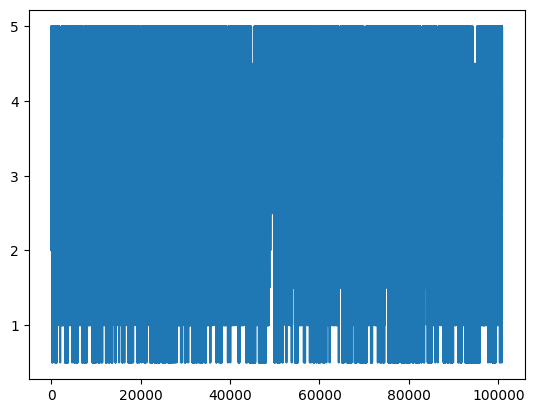

In [10]:
# Plot gráficos (gerar gráficos)
notas.nota.plot()

<Axes: ylabel='Frequency'>

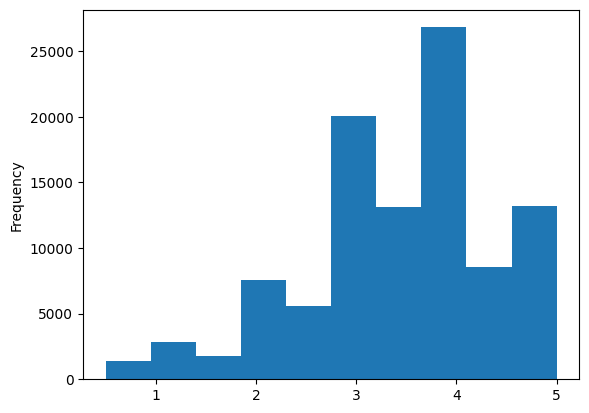

In [11]:
# Selecionar o tipo de gráfico Histograma
notas.nota.plot(kind='hist')

In [12]:
# Informações detalhadas sobre a coluna
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

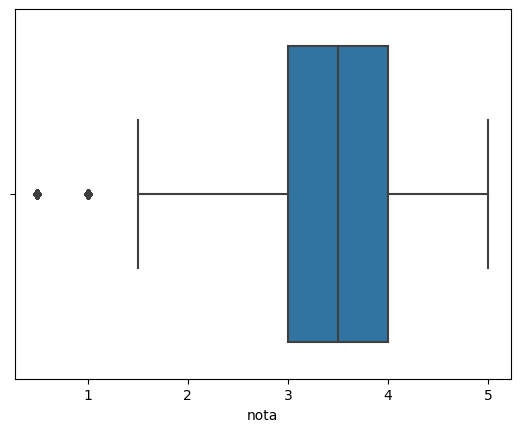

In [13]:
# Boxplot: transformar em gráfico as descrições feitas no .describe(), mostrando média, mediana e os quartis
sns.boxplot(x=notas.nota)

# Analisando filmes e suas notas específicas

In [14]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
# Obtendo a média das notas do filme com Id == 1 uitilizando a coluna 'filmeId' como base para concatenação
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [16]:
# Obtenod a média de todos os filmes utilizando o groupby para agrupar as tabelas através da coluna 'filmeId'
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

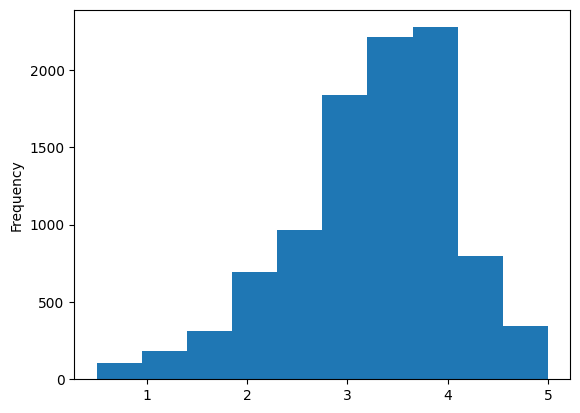

In [17]:
# Gerar gráficos com as médias

medias_por_filme.plot(kind="hist")

<Axes: xlabel='nota'>

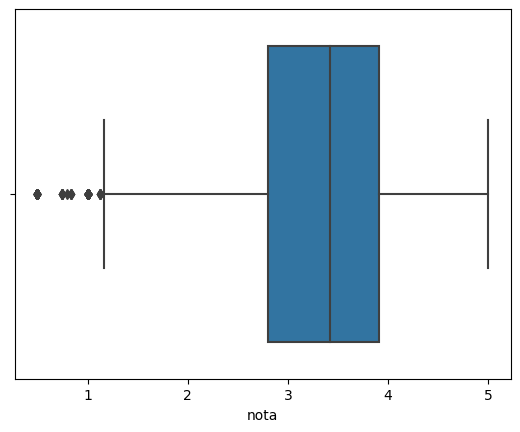

In [18]:
sns.boxplot(x=medias_por_filme)

In [19]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<ipython-input-20-e905c2b0ea08>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins = 10)


<Axes: xlabel='nota', ylabel='Density'>

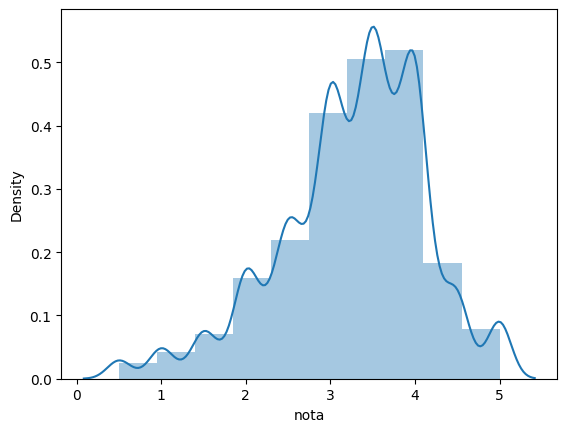

In [20]:
sns.distplot(medias_por_filme, bins = 10)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

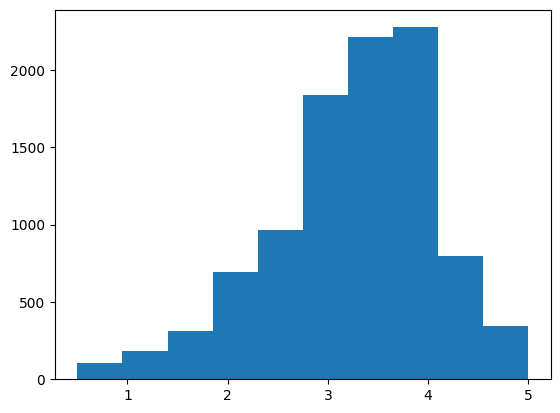

In [21]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

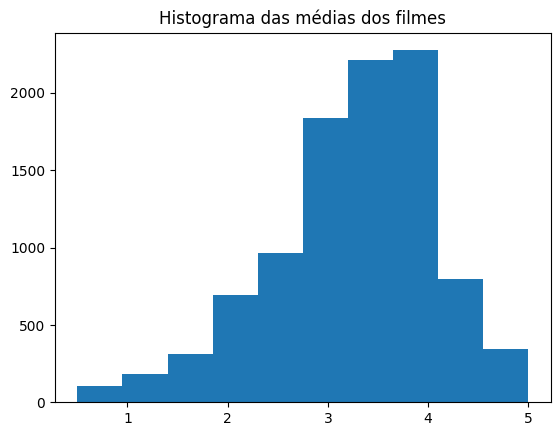

In [22]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

<Axes: ylabel='nota'>

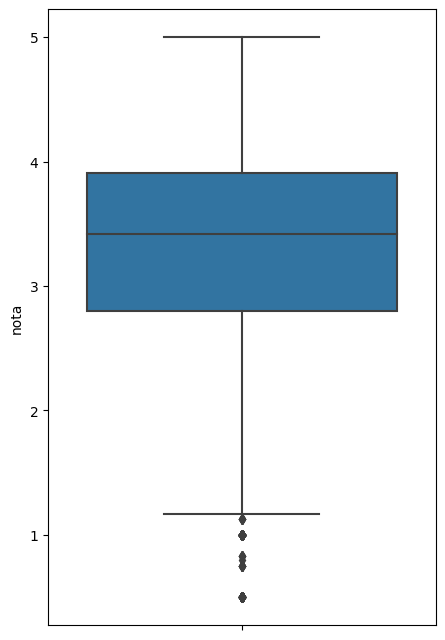

In [23]:
plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)

# Variáveis
Plotando gráficos com variáveis categóricas usando o seaborn

In [24]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.original_language.unique()

# CATEGÓRICA NOMINAL

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [25]:
# CATEGÓRICA ORDINAL
  # primeiro grau < segundo grau < terceiro grau (não tem como realizar operações artitméticas)

In [26]:
# QUANTITATIVA CONTÍNUO
  # Orçamento, por exemplo

In [27]:
# QUANTITATIVA INTERVALAR
  # Notas dadas aos filmes - 1, 2, 3, ..., 5

In [28]:
# Tranformando em dataframe e deixando mais bunitin

contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns= ['original_language', 'total']
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

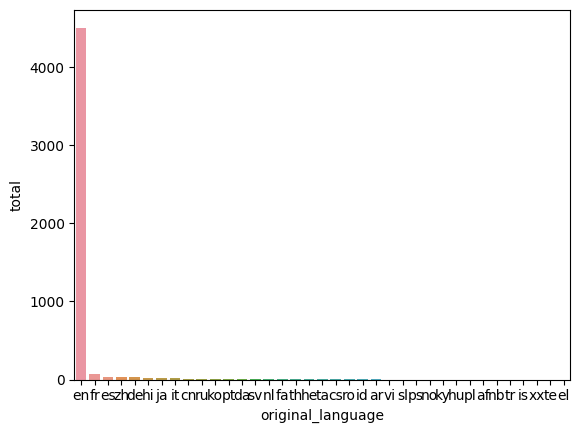

In [29]:
# Fazendo nas unhas
sns.barplot(x="original_language", y="total", data = contagem_de_linguas)

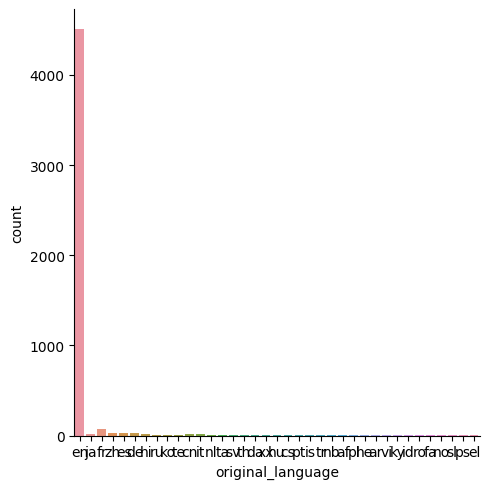

In [30]:
# Fazendo direto sem harmonização prévia
sns.catplot(x="original_language", kind="count", data=tmdb)

In [31]:
# Definindo lógica para melhor visualização do inglês em relação às outras linguas

total_por_lingua = tmdb["original_language"].value_counts()
total_ingles = total_por_lingua.loc["en"]
total_geral = total_por_lingua.sum()
total_outros = total_geral - total_ingles
print(total_ingles, total_outros)

4505 298


In [32]:
# Criar um dicionário no python

dados = {
    'lingua' : ['ingles','outros'],
    'total': [total_ingles, total_outros]

}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

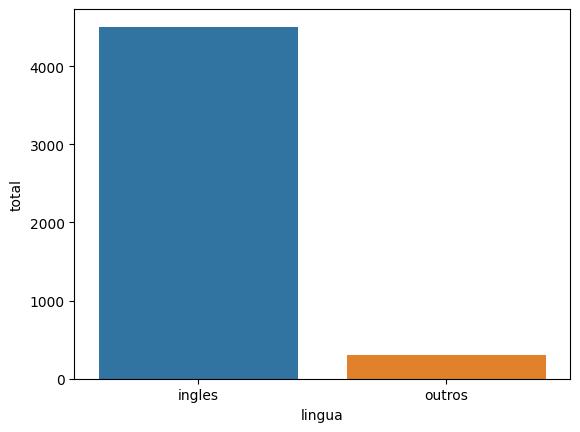

In [33]:
sns.barplot(data = dados, x = 'lingua', y = 'total')

# Gerando uma Query

In [116]:
# Trazendo apenas as informações que não possuem o 'en'

filmes_nao_ingles = tmdb.query("original_language != 'en'").original_language.value_counts().to_frame().reset_index()
filmes_nao_ingles.columns = ['original_language', 'total']
filmes_nao_ingles.head()

,original_language,total
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19


<Axes: xlabel='original_language', ylabel='total'>

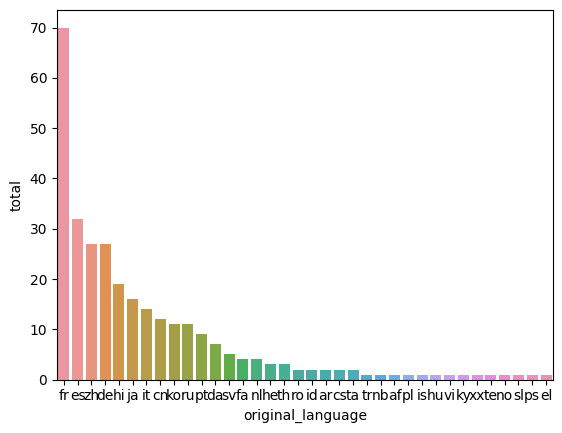

In [108]:
sns.barplot(data = filmes_nao_ingles, x = 'original_language', y = 'total')

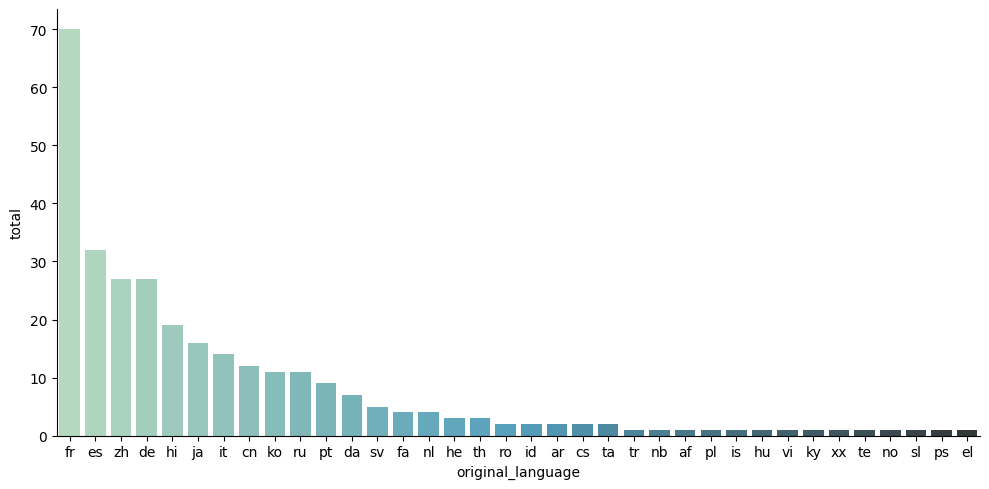

In [120]:
# Gráfico com estilizações

sns.catplot(x="original_language", y="total", data = filmes_nao_ingles, kind="bar", estimator=sum, aspect=2, palette = "GnBu_d")